<a href="https://colab.research.google.com/github/s0ku00/DTS/blob/main/Supervised_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

data = pd.read_csv('/content/5G_energy_consumption_dataset.csv')

print (data.head(10))
print (data.info())

              Time   BS     Energy      load  ESMODE   TXpower
0  20230101 010000  B_0  64.275037  0.487936     0.0  7.101719
1  20230101 020000  B_0  55.904335  0.344468     0.0  7.101719
2  20230101 030000  B_0  57.698057  0.193766     0.0  7.101719
3  20230101 040000  B_0  55.156951  0.222383     0.0  7.101719
4  20230101 050000  B_0  56.053812  0.175436     0.0  7.101719
5  20230101 070000  B_0  82.959641  0.351585     0.0  7.101719
6  20230101 080000  B_0  91.031390  0.759298     0.0  7.101719
7  20230101 090000  B_0  78.176383  0.887798     0.0  7.101719
8  20230101 100000  B_0  72.645740  0.624745     0.0  7.101719
9  20230101 140000  B_0  66.666667  0.437926     0.0  7.101719
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load

In [ ]:
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64


In [ ]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=5104da5a8a9fc926c4a5f2dd9879c6607acd9f2db1aae0178dc8f2449f4b622f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title='Energy Data Profiling Report')

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
x=data[["load"]].values
y=data["Energy"].values

# Splitting the data with test size of 30%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

# Build linear regression model
model=LinearRegression()
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 111.86316918122337
R squared 0.41486302893817284


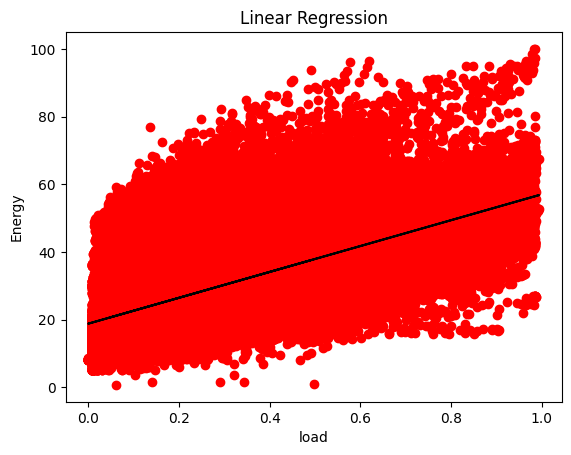

In [ ]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Energy")
plt.xlabel("load")
plt.plot(x,model.predict(x),color="k")
plt.show()

MSE 153.38165456626282
R squared 0.19768698288927755


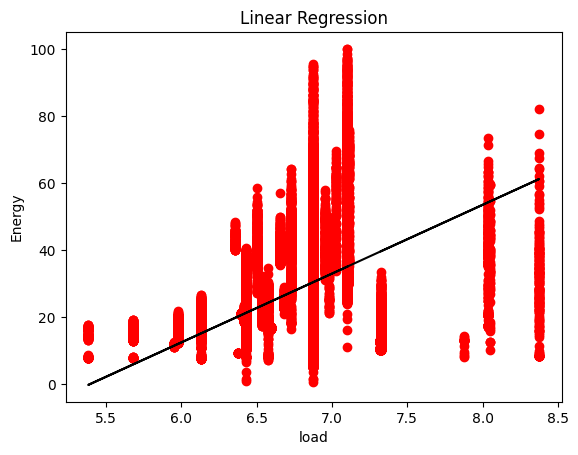

In [ ]:
x=data[["TXpower"]].values
y=data["Energy"].values

# Splitting the data with test size of 30%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

# Build linear regression model
model=LinearRegression()
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Energy")
plt.xlabel("load")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [ ]:
x_2=data[["load","TXpower"]].values
y=data["Energy"].values

# Splitting the data with test size of 30%
x_train,x_test,y_train,y_test=train_test_split(x_2,y,test_size=0.30,random_state=40)

# Build linear regression model
model=LinearRegression()
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 91.39096647492924
R squared 0.5219495952334483
